# Project 2 - Classification supervised learning : 

______________________________

Adult Census Income Prediction : Project Title Adult Census Income Prediction
Domain Finance

Problem Statement:
The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into two groups greater than 50K group or less than or equals to 50K group.


In [58]:
import numpy as np
import pandas as pd
data1 = pd.read_csv('adult.csv')
data1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [59]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [60]:
data1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [61]:
data1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [62]:
data1.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [63]:
data1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [64]:
data1.dropna(inplace = True)

In [65]:
data1.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

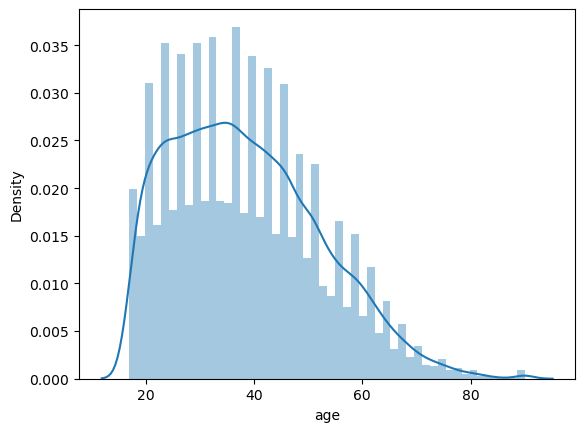

In [70]:
import seaborn as sns
sns.distplot(data1.age)

In [67]:
data1.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

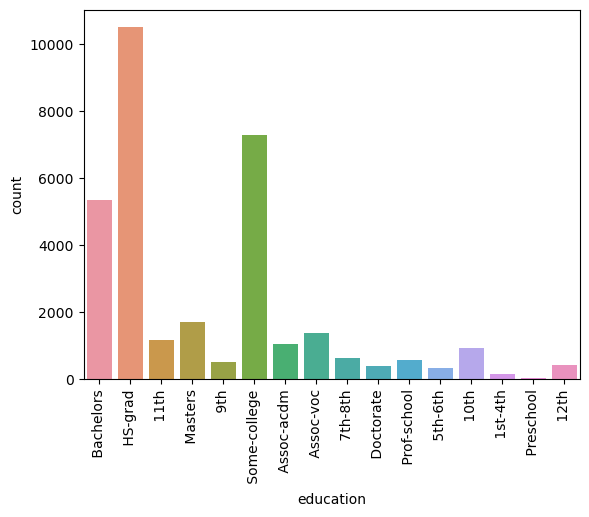

In [68]:
import matplotlib.pyplot as plt
sns.countplot(data1.education)
plt.xticks(rotation = 90)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

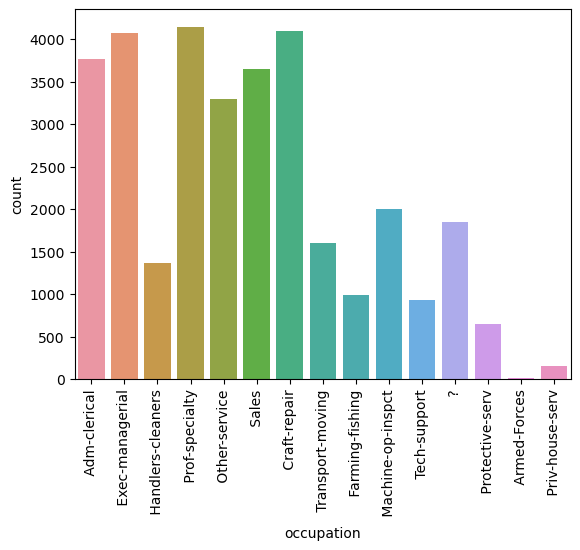

In [21]:
sns.countplot(data1.occupation)
plt.xticks(rotation = 90)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

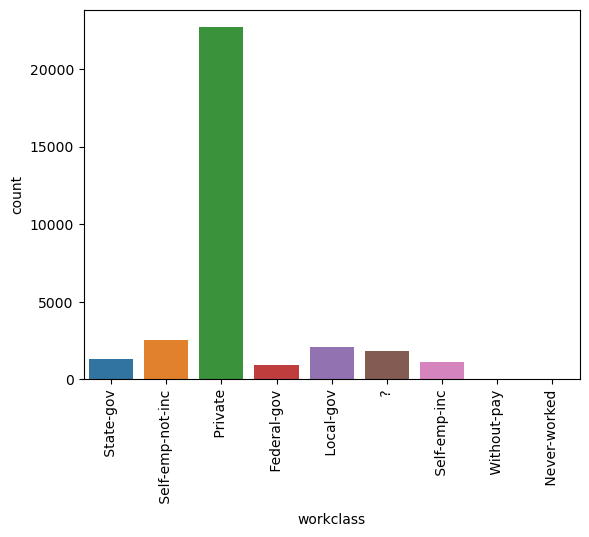

In [22]:
sns.countplot(data1.workclass)
plt.xticks(rotation = 90)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

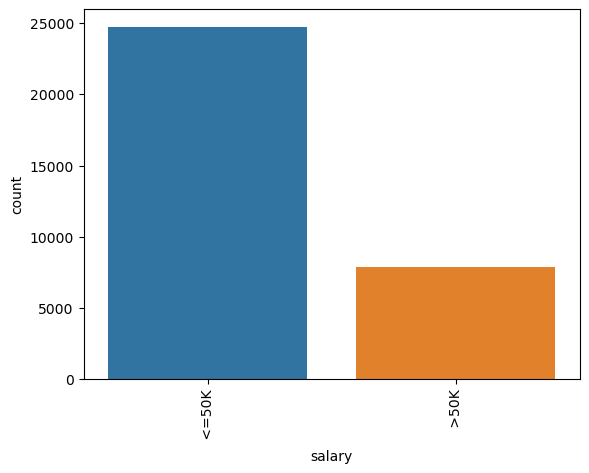

In [23]:
sns.countplot(data1.salary)
plt.xticks(rotation = 90)

<AxesSubplot:>

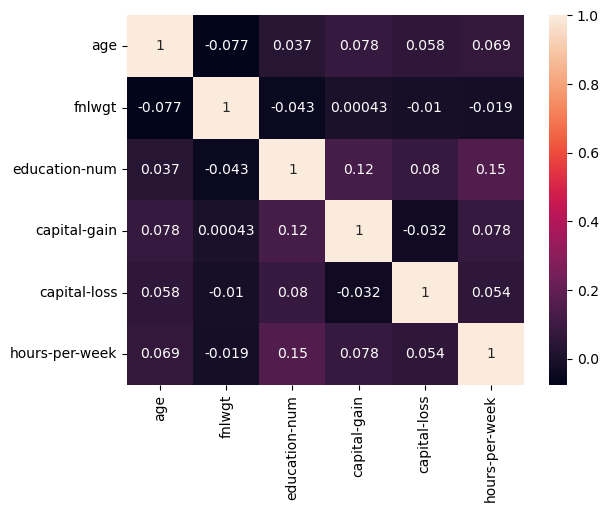

In [24]:
sns.heatmap(data1.corr(),annot = True)


In [25]:
#ENCODING DATA

In [26]:
#### Import label encoder
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
data1.columns
  


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [27]:
data1['workclass'] = le.fit_transform(data1['workclass'])
data1['education'] = le.fit_transform(data1['education'])
data1['workclass'] = le.fit_transform(data1['workclass'])

data1['race'] = le.fit_transform(data1['race'])
data1['sex'] = le.fit_transform(data1['sex'])
data1['relationship'] = le.fit_transform(data1['relationship'])
data1['occupation'] = le.fit_transform(data1['occupation'])
data1['country'] = le.fit_transform(data1['country'])
data1['marital-status'] = le.fit_transform(data1['marital-status'])

In [28]:
data1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,<=50K
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,>50K
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,<=50K
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,<=50K


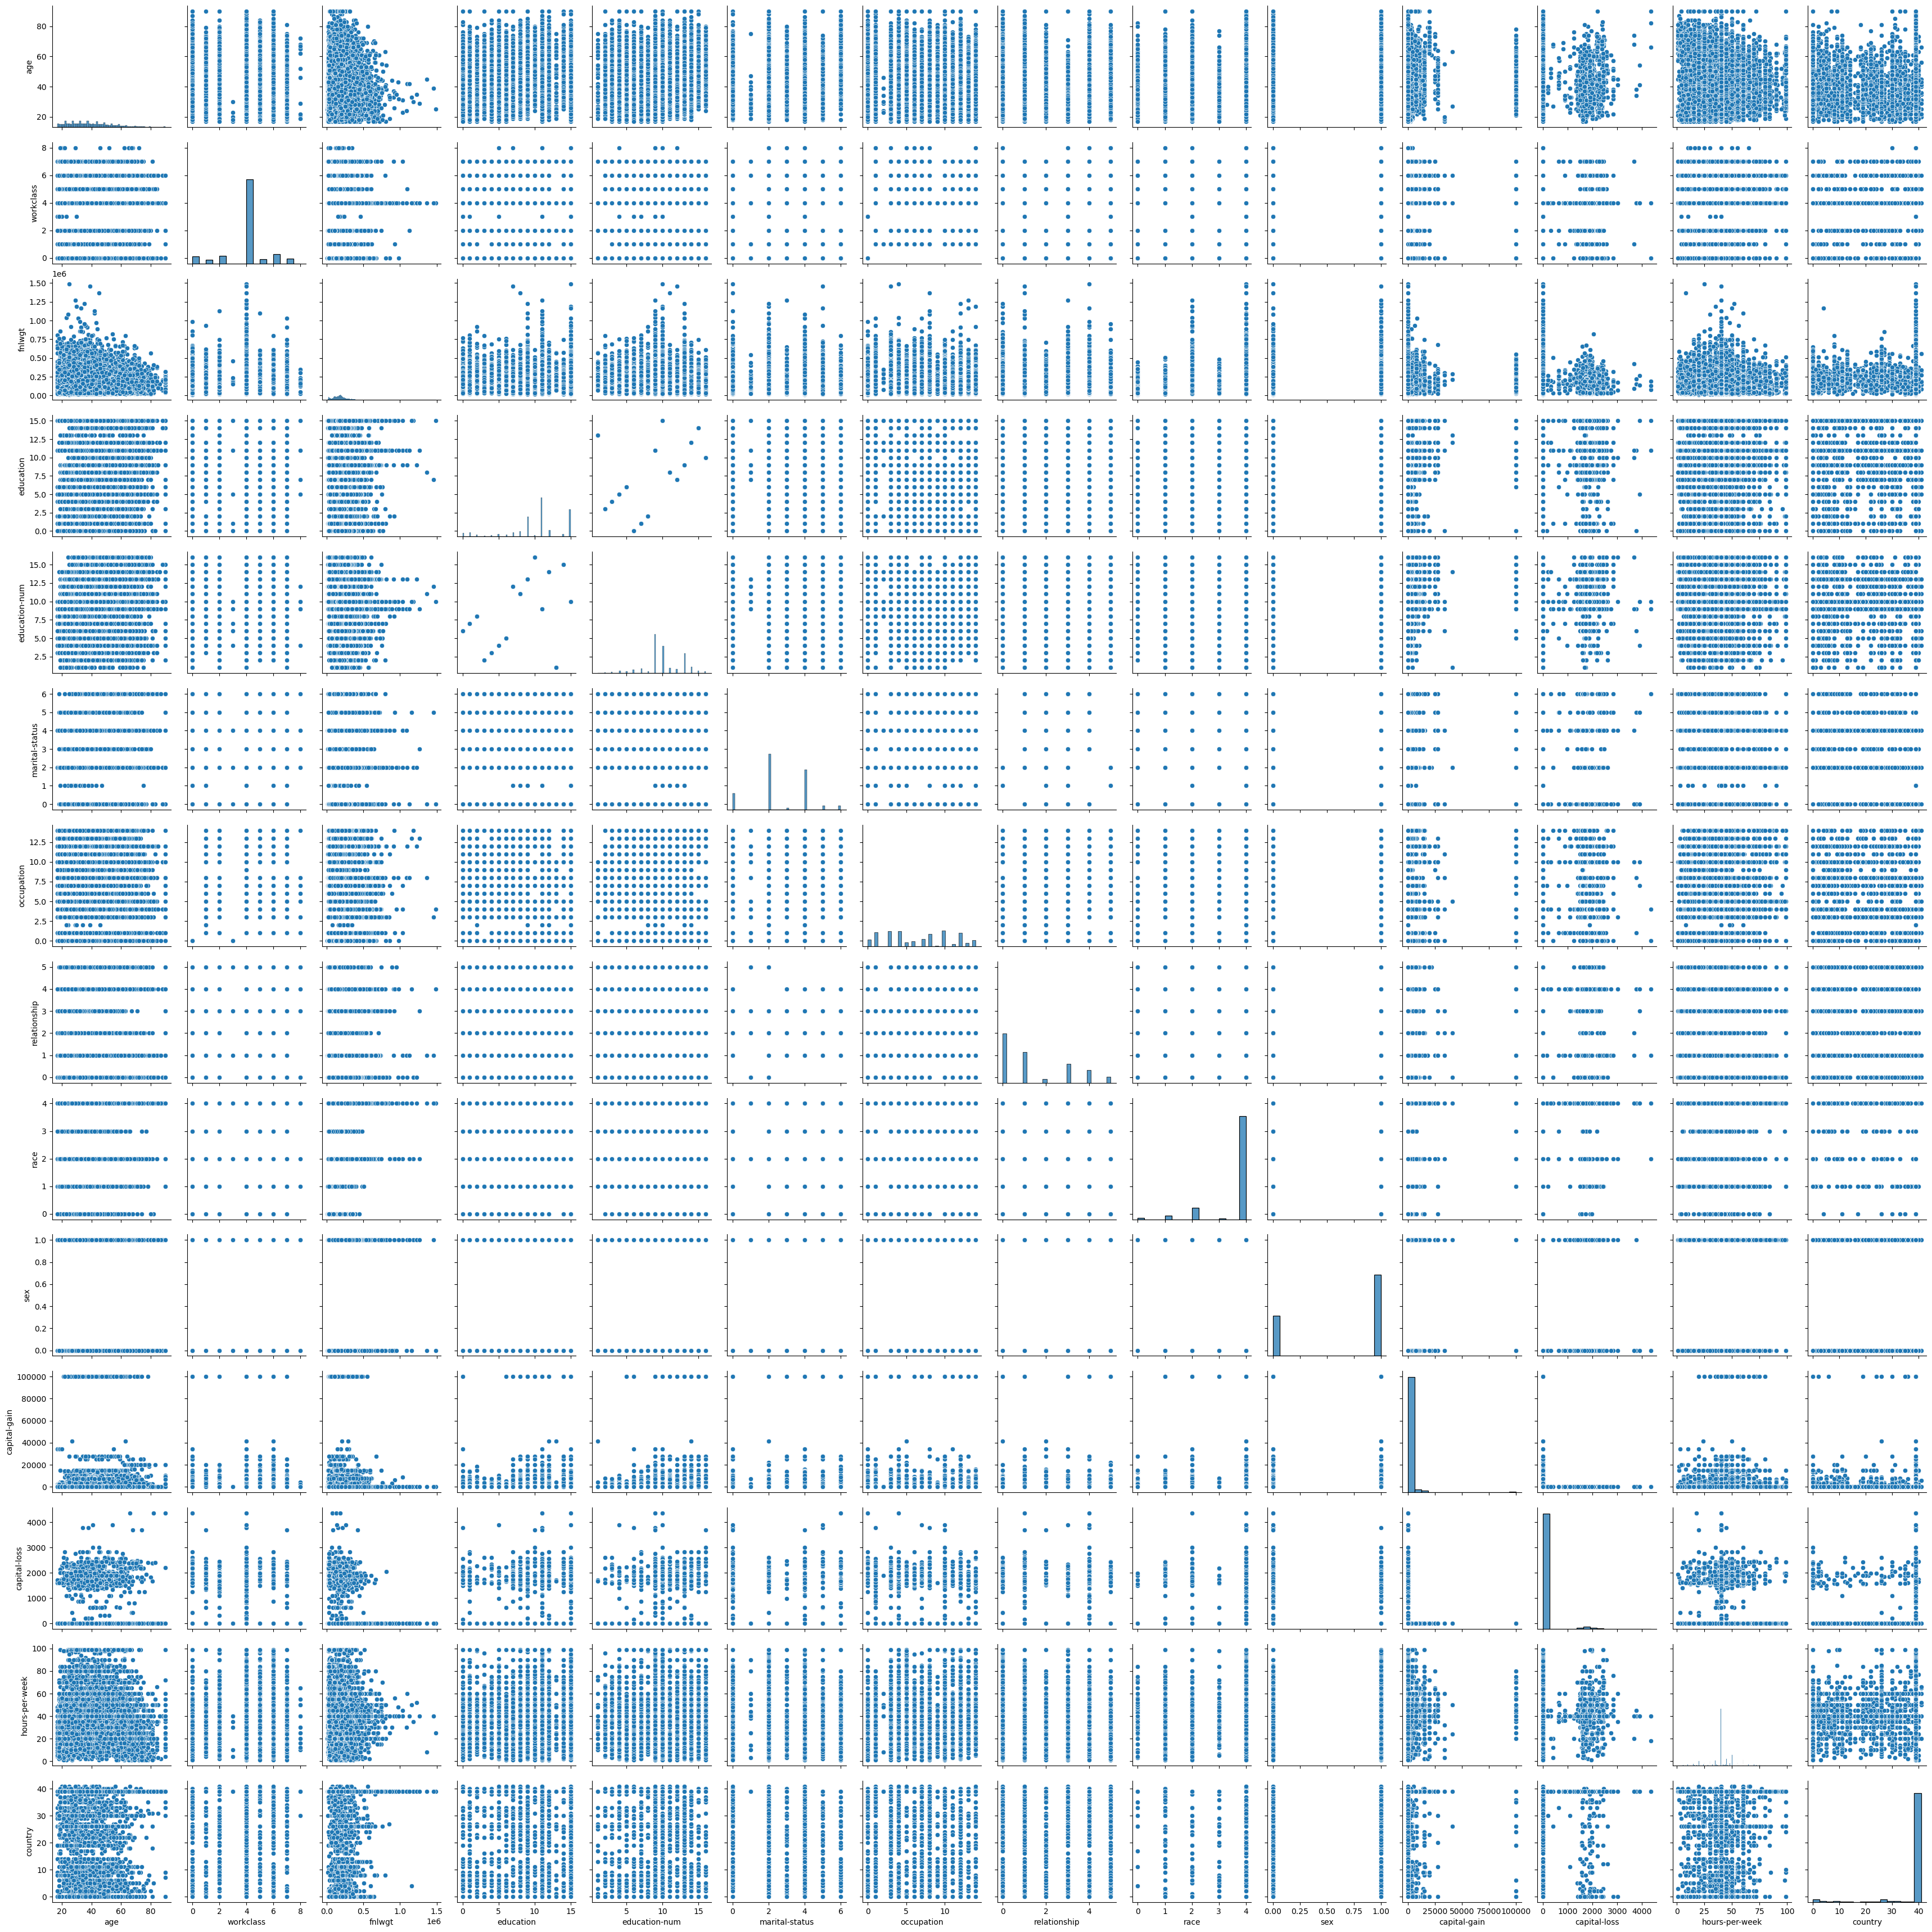

In [29]:
import seaborn as sns
sns.pairplot(data1)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log = LogisticRegression()

In [43]:
x = data1.drop('salary',axis = 1)
y = data1['salary']

In [44]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [45]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

In [46]:
log.fit(x,y)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
log.intercept_

array([-0.00161142])

In [48]:
log.coef_

array([[ 1.59636114e-02, -4.51830642e-03, -2.22771757e-06,
        -8.90242270e-03,  3.75924197e-03, -1.19130884e-02,
        -2.48600399e-03, -1.26135269e-02, -4.31213443e-03,
         1.54599766e-03,  3.21794230e-04,  7.72277773e-04,
         9.81564467e-03, -5.05935091e-02]])

In [49]:
log.score(x,y)

0.7887042781241362

In [50]:
x.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country'],
      dtype='object')

In [51]:
log.predict([[1,1,5,3,1,1,21561,23333,500000,12,0,10,5,7]])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([' <=50K'], dtype=object)

In [52]:
### navi bayes
from sklearn.naive_bayes import GaussianNB

In [53]:
nb = GaussianNB()

In [ ]:

import numpy as np
x = np.reshape(x,(-1,1))
y = np.reshape(y,(-1,1))

In [55]:
nb.fit(x,y)

GaussianNB()

In [56]:
nb.var_

array([[2.07695385e+02, 1.32957768e+01, 1.13380154e+10, 2.82012868e+01,
        1.70750268e+01, 1.37767577e+01, 2.92498808e+01, 1.35365939e+01,
        1.19132894e+01, 1.13779174e+01, 9.27610940e+05, 9.65763820e+04,
        1.62891946e+02, 7.29828779e+01],
       [1.21776288e+02, 1.31246361e+01, 1.05134747e+10, 1.91626934e+01,
        1.68285687e+01, 1.18757307e+01, 2.78853403e+01, 1.36319219e+01,
        1.16803096e+01, 1.12682099e+01, 2.12268879e+08, 3.54571367e+05,
        1.32410516e+02, 7.02915509e+01]])

In [57]:
nb.score(x,y)

0.7950308651454193

In [58]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [59]:
## svm 
from sklearn.svm import SVC

In [60]:
svr = SVC()

In [61]:
svr.fit(x,y)

SVC()

In [62]:
svr.predict([[1,1,5,3,1,1,21561,23333,500000,12,0,2,3,8]])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([' <=50K'], dtype=object)

In [63]:
svr.score(x,y)

0.7967814256318909

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,train_size=.75)

In [66]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [67]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

In [68]:
ytrain.shape

(24420,)

In [69]:
svc = SVC()

svc.fit(xtrain,ytrain)

y_pred = svc.predict(xtest)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(ytest, y_pred)

array([[6181,    2],
       [1684,  274]], dtype=int64)

In [72]:
svc.score(xtrain, ytrain)

0.795004095004095

In [73]:
svc.score(xtest, ytest)

0.7929001351185359

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtc = DecisionTreeClassifier()

In [76]:
dtc.fit(x,y)

DecisionTreeClassifier()

In [77]:
from sklearn.tree import plot_tree

[Text(0.7097726034865943, 0.9893617021276596, 'X[7] <= 0.5\ngini = 0.366\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(0.4794718531272654, 0.9680851063829787, 'X[4] <= 12.5\ngini = 0.495\nsamples = 13193\nvalue = [7275, 5918]'),
 Text(0.32846534968575775, 0.9468085106382979, 'X[10] <= 5095.5\ngini = 0.442\nsamples = 9224\nvalue = [6178, 3046]'),
 Text(0.1841459526669525, 0.925531914893617, 'X[4] <= 8.5\ngini = 0.417\nsamples = 8766\nvalue = [6170, 2596]'),
 Text(0.03688390972165287, 0.9042553191489362, 'X[11] <= 1791.5\ngini = 0.186\nsamples = 1459\nvalue = [1308, 151]'),
 Text(0.02305407380457854, 0.8829787234042553, 'X[0] <= 36.5\ngini = 0.173\nsamples = 1428\nvalue = [1291, 137]'),
 Text(0.006385905459448134, 0.8617021276595744, 'X[12] <= 49.0\ngini = 0.082\nsamples = 398\nvalue = [381, 17]'),
 Text(0.004099368697220628, 0.8404255319148937, 'X[4] <= 7.5\ngini = 0.059\nsamples = 329\nvalue = [319, 10]'),
 Text(0.0017855028103449847, 0.8191489361702128, 'X[13] <= 1.0\ngini = 0.045\

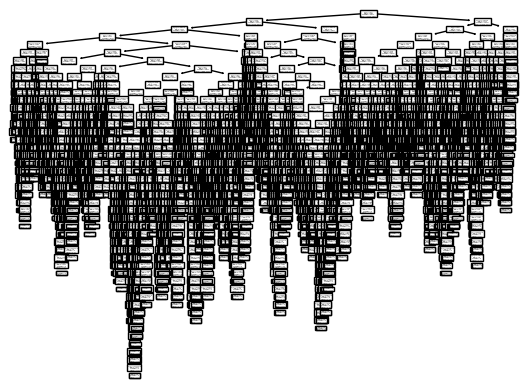

In [78]:
plot_tree(dtc)

In [79]:
dtc.score(x,y)

0.9999692884125181

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [81]:
xtrain, xtest, ytrain, ytest = train_test_split(data1.drop("salary",axis=1),data1["salary"],train_size = .75)

In [82]:
xtrain.shape, xtest.shape

((24420, 14), (8141, 14))

In [83]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

[Text(0.6969518764040145, 0.9888888888888889, 'X[7] <= 0.5\ngini = 0.365\nsamples = 24420\nvalue = [18544, 5876]'),
 Text(0.4524805814795371, 0.9666666666666667, 'X[4] <= 12.5\ngini = 0.494\nsamples = 9904\nvalue = [5475, 4429]'),
 Text(0.28479793130767794, 0.9444444444444444, 'X[10] <= 5095.5\ngini = 0.441\nsamples = 6936\nvalue = [4658, 2278]'),
 Text(0.11525834385240051, 0.9222222222222223, 'X[4] <= 8.5\ngini = 0.416\nsamples = 6603\nvalue = [4654, 1949]'),
 Text(0.0339908247659098, 0.9, 'X[11] <= 1760.0\ngini = 0.179\nsamples = 1115\nvalue = [1004, 111]'),
 Text(0.023113243370422434, 0.8777777777777778, 'X[0] <= 36.5\ngini = 0.165\nsamples = 1090\nvalue = [991, 99]'),
 Text(0.0025017273831931574, 0.8555555555555555, 'X[2] <= 29563.0\ngini = 0.068\nsamples = 311\nvalue = [300, 11]'),
 Text(0.0007624312024969622, 0.8333333333333334, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0003812156012484811, 0.8111111111111111, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Te

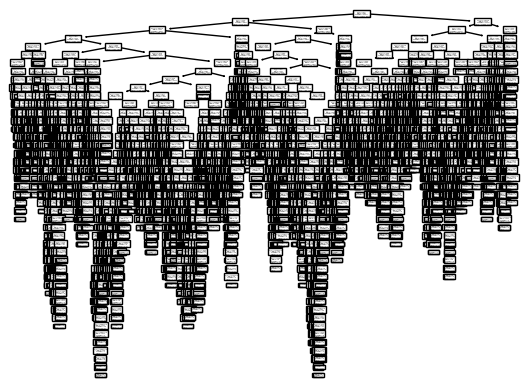

In [84]:
plot_tree(dtc)

In [85]:
dtc.score(xtrain,ytrain)

0.9999590499590499

In [86]:
y_pred = dtc.predict(xtest)

In [87]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      6176
        >50K       0.61      0.62      0.61      1965

    accuracy                           0.81      8141
   macro avg       0.74      0.75      0.74      8141
weighted avg       0.81      0.81      0.81      8141



In [88]:
dtc.score(xtest, ytest)

0.8112025549686771